<a href="https://colab.research.google.com/github/uyen-vuong/machine-learning/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Thư viện và đọc dữ liệu

In [ ]:
import pandas as pd

In [ ]:
path = "/content/tips.csv"
data = pd.read_csv(path)
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 1. Matplotlib

In [ ]:
import matplotlib.pyplot as plt

### 1.1 Scatter


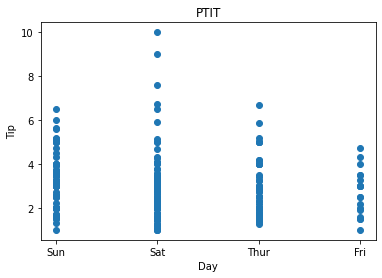

In [ ]:
plt.scatter(data['day'],data['tip'])
plt.title("PTIT")
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

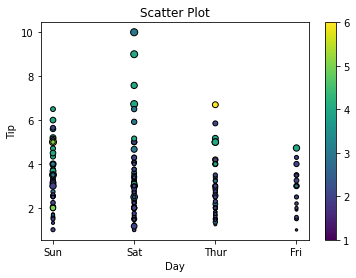

In [ ]:
plt.scatter(data['day'],data['tip'],c=data['size'],s=data['total_bill'],edgecolor = 'k')
#c: đánh màu sắc theo size 1->6 quy định màu
#s: đánh kích cỡ của điểm đó theo total_bill
plt.title("Scatter Plot")
plt.xlabel('Day')
plt.ylabel('Tip')

plt.colorbar()
plt.show()

### 1.2 Biểu đồ đường


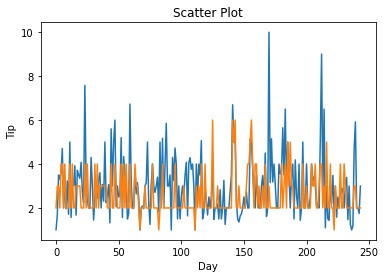

In [ ]:
plt.plot(data['tip'])

plt.plot(data['size'])
 
plt.title("Scatter Plot")
 
plt.xlabel('Day')
plt.ylabel('Tip')
 
plt.show()

### 1.3 Biểu đồ cột



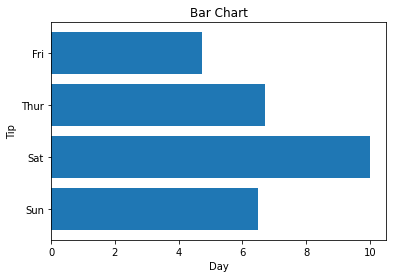

In [ ]:

#plt.bar(data['day'], data['tip'],color = "hotpink")

# Nằm ngang
plt.barh(data['day'], data['tip'])
plt.title("Bar Chart")
 
plt.xlabel('Day')
plt.ylabel('Tip')
 
plt.show()

### 1.4 Histogram

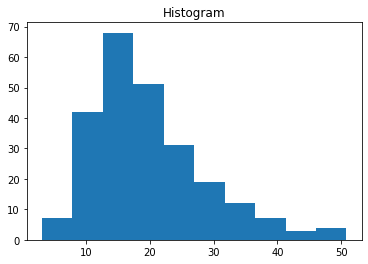

In [ ]:
plt.hist(data['total_bill'])
 
plt.title("Histogram")
 
plt.show()
# trục Y cung cấp thông tin về tần suất. 
# trục X đại diện cho các bin, mỗi bin thì sẽ là 1 khoảng giá trị

# **2. Seaborn**

In [ ]:
#thư viện
import seaborn as sns

### 2.1 Scatterplot

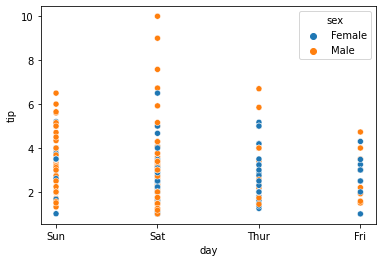

In [ ]:
#sns.scatterplot(x='day', y='tip', data=data,)
sns.scatterplot(x='day', y='tip', data=data, hue='sex')          
plt.show()

### 2.2 Line Plot


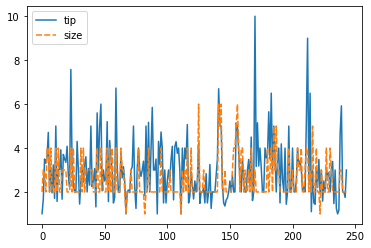

In [ ]:
sns.lineplot(data=data.drop(['total_bill'], axis=1))

plt.show()

### 2.3 Bar Plot

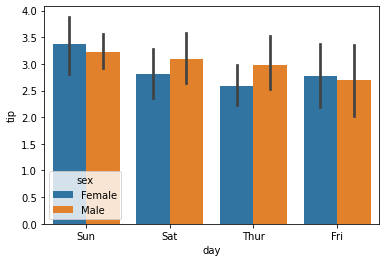

In [ ]:
sns.barplot(x='day',y='tip', data=data,  hue='sex')
       
plt.show()

### 2.4 Histogram

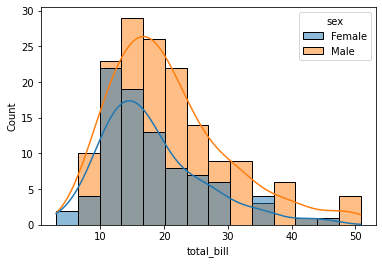

In [ ]:
sns.histplot(x='total_bill', data=data, kde=True, hue='sex')
#Nếu True, tính toán ước tính mật độ hạt nhân để phân bố và hiển thị trên biểu đồ dưới dạng (một hoặc nhiều) dòng.
plt.show()

# 3 Bokeh

### 3.2 Line Chart


In [ ]:
df = data['tip'].value_counts()
df

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

# 4. Plotly


### 4.1 Scatter Plot

In [ ]:
import plotly.express as px
import pandas as pd

data = pd.read_csv("tips.csv")
 
fig = px.scatter(data, x="day", y="tip", color='sex')

fig.show()

### 4.2 Line Chart

In [ ]:
import plotly.express as px
import pandas as pd
 
data = pd.read_csv("tips.csv")
 
fig = px.line(data, y='tip', color='sex')

fig.show()


### 4.3. Bar Chart

In [ ]:
import plotly.express as px
import pandas as pd
 
fig = px.bar(data, x='day', y='tip', color='sex')

fig.show()

### 4.4 Histogram

In [ ]:
import plotly.express as px
import pandas as pd
 
fig = px.histogram(data, x='total_bill', color='sex')
 
fig.show()

### Tạo dropdown menu:

In [ ]:
import plotly.graph_objects as px
import pandas as pd
 
 
plot = px.Figure(data=[px.Scatter(x=data['day'],y=data['tip'],mode='markers',)])
 
# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)
 
plot.show()

### Thêm nút

In [ ]:
import plotly.graph_objects as px
import pandas as pd
 
 
plot = px.Figure(data=[px.Scatter(
    x=data['day'],
    y=data['tip'],
    mode='markers',)
])
 

plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
        ),
    ]
)
 
plot.show()

In [ ]:
import plotly.graph_objects as px
import pandas as pd

plot = px.Figure(data=[px.Scatter(
    y=data['tip'],
    mode='lines',)
])
 
plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    step="day",
                    stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
 
plot.show()